lets import all the libraries required

In [101]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
np.random.seed(42)

In [103]:
dogs_wishker_length = np.random.normal(loc=5, scale=1, size=10)
dogs_flappiness_index = np.random.normal(loc =8, scale=1, size=10)

In [104]:
# dogs_wishker_length


# dogs_flappiness_index

In [105]:
cats_wishker_length = np.random.normal(loc=8, scale=1, size=10)
cats_flappiness_index = np.random.normal(loc =5, scale=1, size=10)

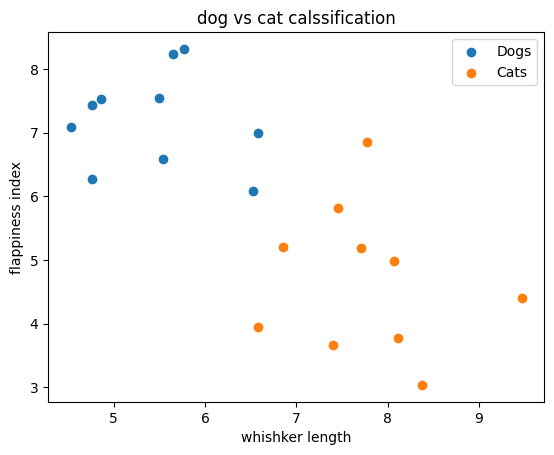

In [106]:
plt.scatter(dogs_wishker_length,dogs_flappiness_index,label='Dogs')
plt.scatter(cats_wishker_length,cats_flappiness_index,label='Cats')
plt.xlabel('whishker length')
plt.ylabel('flappiness index')
plt.title('dog vs cat calssification')
plt.legend()
plt.show()

In [107]:
# reanom linear classifier algo
def randomLinearClassifier(dogs_data, cats_data, k, d):
    # d = no.of features
    best_error = float('inf')
    best_theta = None
    best_theta0 = None
    # np.random.seed(42) requires only if you want same output every time and generate same random values every time
    for i in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        # lets calculate error
        error = computeError(dogs_data, cats_data, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0
    return best_theta, best_theta0

In [108]:
def computeError(dogs_data, cats_data, theta, theta0):
    error = 0
    for dog in dogs_data:
        if np.dot(theta, dog) + theta0  <= 0:
            error += 1
    for cat in cats_data:
        if np.dot(theta , cat) + theta0 > 0:
            error += 1
    return error

In [109]:
# so here θ₀ + θ₁x₁ + θ₂x₂ = 0
# this is also equal to 
# [θ₀, θ₁, θ₂] ⋅ [1, x₁, x₂]ᵀ = 0

In [110]:
dogs_data = np.vstack((dogs_wishker_length,dogs_flappiness_index,)).T
cats_data = np.vstack((cats_wishker_length,cats_flappiness_index,)).T


Best θ (weights): [-0.676922    0.61167629]
Best θ₀ (bias): 1.030999522495951


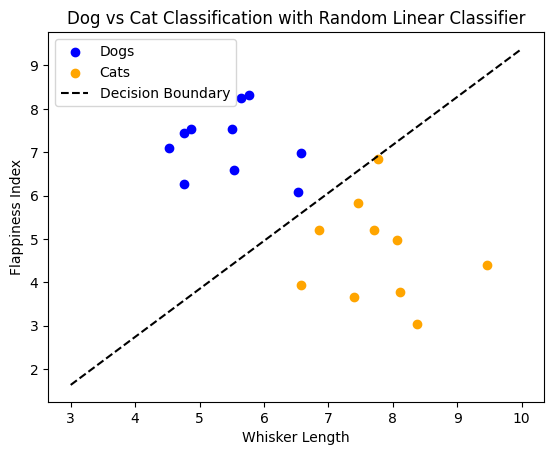

In [111]:
theta, theta0 = randomLinearClassifier(dogs_data, cats_data, k=100, d=2)
print("Best θ (weights):", theta)
print("Best θ₀ (bias):", theta0)

# 📊 Plot decision boundary
plt.scatter(dogs_wishker_length, dogs_flappiness_index, label='Dogs', color='blue')
plt.scatter(cats_wishker_length, cats_flappiness_index, label='Cats', color='orange')

# Decision boundary: θ₁x₁ + θ₂x₂ + θ₀ = 0 → x₂ = -(θ₁x₁ + θ₀)/θ₂
x_values = np.linspace(3, 10, 100)
y_values = -(theta[0]*x_values + theta0) / theta[1]

plt.plot(x_values, y_values, 'k--', label='Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Flappiness Index')
plt.title('Dog vs Cat Classification with Random Linear Classifier')
plt.legend()
plt.show()